In [3]:
import os
import json
import matplotlib.pyplot as plt

# Directory paths
# directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test'
directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0/local_test'
directory_path_test_feddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedDC/local_test'
directory_path_test_fedmem = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedMEM_0.5_kappa_0.5/local_test'
directory_path_test_siloed = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/siloed/local_test'
directory_path_test_prox = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedProx/local_test' 
directory_path_test_avg = '//proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedAvg/local_test' 

output_dir = './user_plots'  # Folder to save individual plots
os.makedirs(output_dir, exist_ok=True)

# File lists
cfeddc_files = sorted([f for f in os.listdir(directory_path_test_cfeddc) if f.endswith('.json')])
feddc_files = sorted([f for f in os.listdir(directory_path_test_feddc) if f.endswith('.json')])
fedmem_files = sorted([f for f in os.listdir(directory_path_test_fedmem) if f.endswith('.json')])
siloed_files = sorted([f for f in os.listdir(directory_path_test_siloed) if f.endswith('.json')])
prox_files = sorted([f for f in os.listdir(directory_path_test_prox) if f.endswith('.json')])
avg_files = sorted([f for f in os.listdir(directory_path_test_avg) if f.endswith('.json')])

In [4]:
import os
import json
import matplotlib.pyplot as plt

# Directory paths
# directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test'
directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0/local_test'
directory_path_test_feddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedDC/local_test'
dictory_path_test_fedmem = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedMEM_0.5_kappa_0.5/local_test'
directory_path_test_siloed = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/siloed/local_test'
directory_path_test_prox = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedProx/local_test'
directory_path_test_avg = '//proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedAvg/local_test'
output_dir = './user_plots'  # Folder to save individual plots
os.makedirs(output_dir, exist_ok=True)

# File lists
cfeddc_files = sorted([f for f in os.listdir(directory_path_test_cfeddc) if f.endswith('.json')])
feddc_files = sorted([f for f in os.listdir(directory_path_test_feddc) if f.endswith('.json')])
siloed_files = sorted([f for f in os.listdir(directory_path_test_siloed) if f.endswith('.json')])
fedmem_files = sorted([f for f in os.listdir(dictory_path_test_fedmem) if f.endswith('.json')])
prox_files = sorted([f for f in os.listdir(directory_path_test_prox) if f.endswith('.json')])
avg_files = sorted([f for f in os.listdir(directory_path_test_avg) if f.endswith('.json')])
# Stats containers
resourceless_cmae_cfeddc = []
resourceful_cmae_cfeddc = []
resourceless_cmae_feddc = []
resourceful_cmae_feddc = []
resourceless_cmae_siloed = []
resourceful_cmae_siloed = []
resourceless_cmae_fedmem = []
resourceful_cmae_fedmem = []
resourceless_cmae_prox = []
resourceful_cmae_prox = []
resourceless_cmae_avg = []
resourceful_cmae_avg = []

for file_name in cfeddc_files:
    if file_name in siloed_files and file_name in feddc_files:
        cfeddc_path = os.path.join(directory_path_test_cfeddc, file_name)
        feddc_path = os.path.join(directory_path_test_feddc, file_name)
        siloed_path = os.path.join(directory_path_test_siloed, file_name)
        fedmem_path = os.path.join(dictory_path_test_fedmem, file_name)
        prox_path = os.path.join(directory_path_test_prox, file_name)
        avg_path = os.path.join(directory_path_test_avg, file_name)

        try:
            with open(cfeddc_path, 'r') as f1, open(feddc_path, 'r') as f2, open(siloed_path, 'r') as f3, open(fedmem_path, 'r') as f4 , open(prox_path, 'r') as f5, open(avg_path, 'r') as f6:
                data_cfeddc = json.load(f1)
                data_feddc = json.load(f2)
                data_siloed = json.load(f3)
                data_fedmem = json.load(f4)
                data_prox = json.load(f5)
                data_avg = json.load(f6)    

                user_id = data_siloed.get("user_id", file_name.split("_")[1])
                resource_category = data_cfeddc.get("resource_category", "Unknown")

                cmae_cfeddc = data_cfeddc.get("validation_results", {}).get("info_mae", [])
                cmae_feddc = data_feddc.get("validation_results", {}).get("info_mae", [])
                cmae_siloed = data_siloed.get("validation_results", {}).get("info_mae", [])
                cmae_fedmem = data_fedmem.get("validation_results", {}).get("info_mae", [])
                cmae_prox = data_prox.get("validation_results", {}).get("info_mae", [])
                cmae_avg = data_avg.get("validation_results", {}).get("info_mae", [])

                # print(f"Processing user {user_id} ({resource_category})...")

                if cmae_cfeddc and cmae_siloed:
                    cmae_cfeddc_val = min(cmae_cfeddc)
                    cmae_feddc_val = min(cmae_feddc)
                    cmae_fedmem_val = min(cmae_fedmem)
                    cmae_prox_val = min(cmae_prox)
                    cmae_avg_val = min(cmae_avg)
                    cmae_siloed_val = cmae_siloed[-1]

                    # Save MAE for statistics
                    if resource_category.lower() == "resourceless user":
                        resourceless_cmae_cfeddc.append(cmae_cfeddc_val)
                        resourceless_cmae_feddc.append(cmae_feddc_val)
                        resourceless_cmae_siloed.append(cmae_siloed_val)
                        resourceless_cmae_fedmem.append(cmae_fedmem_val)
                        resourceless_cmae_prox.append(cmae_prox_val)
                        resourceless_cmae_avg.append(cmae_avg_val)
                    elif resource_category.lower() == "resourceful user":
                        resourceful_cmae_cfeddc.append(cmae_cfeddc_val)
                        resourceful_cmae_feddc.append(cmae_feddc_val)
                        resourceful_cmae_siloed.append(cmae_siloed_val)
                        resourceful_cmae_fedmem.append(cmae_fedmem_val)
                        resourceful_cmae_prox.append(cmae_prox_val)
                        resourceful_cmae_avg.append(cmae_avg_val)

                    # Plot
                    # fig, ax = plt.subplots(figsize=(4, 5))
                    # ax.bar(['CFedDC', 'Siloed'], [mae_cfeddc_val, mae_siloed_val], color=['gray', 'black'])
                    """ax.set_title(f'User {user_id}\n({resource_category})', fontsize=18)
                    ax.set_ylabel('info_cmae', fontsize=16)
                    ax.set_ylim(0, max(mae_cfeddc_val, mae_siloed_val) * 1.2)
                    ax.grid(True, axis='y')

                    # Save plot
                    plt.tight_layout()
                    filename = f'user_{user_id}_{resource_category}.png'.replace(' ', '_')
                    plt.savefig(os.path.join(output_dir, filename))
                    plt.close()
"""
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
 
print("Resourceless CMAE Cfeddc:", resourceless_cmae_cfeddc)
print("Resourceless CMAE FedDC:", resourceless_cmae_feddc)
print("Resourceless CMAE FedMEM:", resourceless_cmae_fedmem)
print("Resourceless CMAE siloed:", resourceless_cmae_siloed)
print("Resourceless CMAE Prox:", resourceless_cmae_prox)
print("Resourceless CMAE Avg:", resourceless_cmae_avg)

print("Resourceful CMAE Cfeddc:", resourceful_cmae_cfeddc)
print("Resourceful CMAE FedDC:", resourceful_cmae_feddc)
print("Resourceful CMAE FedMEM:", resourceful_cmae_fedmem)
print("Resourceful CMAE siloed:", resourceful_cmae_siloed)
print("Resourceful CMAE Prox:", resourceful_cmae_prox)
print("Resourceful CMAE Avg:", resourceful_cmae_avg)    

Resourceless CMAE Cfeddc: [0.012234926223754883, 1.9999964237213135, 0.10086536407470703, 0.2621563971042633, 0.0048821767171223955, 0.7051038642724355, 0.03191184997558594, 0.006661891937255859, 1.0075292587280273, 0.6785577138264974, 0.005860313773155212, 0.9996907711029053, 0.04475533962249756, 0.9976087808609009, 0.3141084313392639, 0.017543315887451172, 1.7115875085194905, 1.0986223220825195, 0.4998462200164795, 0.9927122592926025, 0.07214713096618652, 0.12030998865763347, 0.002720355987548828, 0.023140430450439453, 0.8802533149719238, 0.2143707275390625, 0.12210369110107422, 1.018972635269165, 0.34490013122558594, 0.9991798400878906, 1.3343298435211182, 0.23253822326660156, 0.9996585845947266, 0.03101181983947754, 0.49996140599250793, 2.4995195269584656, 0.3752024968465169, 0.04755924642086029, 1.386955738067627, 1.3939269383748372, 0.717094898223877, 0.009432464838027954, 1.1390380064646404, 0.6723318099975586, 0.012691617012023926, 0.1576191484928131, 0.3458401362101237, 1.0831

In [5]:
import numpy as np

# After processing all files, print statistics
def compute_and_print_stats(mae_list, category_name):
    count = len(mae_list)
    if count > 0:
        avg_mae = sum(mae_list) / count
        std_mae = np.std(mae_list)
    else:
        avg_mae = float('nan')
        std_mae = float('nan')
    
    print(f"Category: {category_name}")
    print(f"  Number of users: {count}")
    print(f"  Average info_cmae (Std Dev): {avg_mae:.4f} ({std_mae:.4f})\n")

print("\n=== Resource Category Statistics CFeddC ===\n")
compute_and_print_stats(resourceless_cmae_cfeddc, "resourceless user")
compute_and_print_stats(resourceful_cmae_cfeddc, "resourceful user")

print("\n=== Resource Category Statistics FedDC ===\n")
compute_and_print_stats(resourceless_cmae_feddc, "resourceless user")
compute_and_print_stats(resourceful_cmae_feddc, "resourceful user")

print("\n=== Resource Category Statistics FedMEM ===\n")
compute_and_print_stats(resourceless_cmae_fedmem, "resourceless user")
compute_and_print_stats(resourceful_cmae_fedmem, "resourceful user")

print("\n=== Resource Category Statistics Siloed ===\n")
compute_and_print_stats(resourceless_cmae_siloed, "resourceless user")
compute_and_print_stats(resourceful_cmae_siloed, "resourceful user")

print("\n=== Resource Category Statistics Prox ===\n")
compute_and_print_stats(resourceless_cmae_prox, "resourceless user")
compute_and_print_stats(resourceful_cmae_prox, "resourceful user") 

print("\n=== Resource Category Statistics Avg ===\n")
compute_and_print_stats(resourceless_cmae_avg, "resourceless user")
compute_and_print_stats(resourceful_cmae_avg, "resourceful user")   





=== Resource Category Statistics CFeddC ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6111 (0.6122)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8978 (0.5203)


=== Resource Category Statistics FedDC ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.5952 (0.5730)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8492 (0.5023)


=== Resource Category Statistics FedMEM ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6712 (0.6675)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8825 (0.5489)


=== Resource Category Statistics Siloed ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 1.0372 (0.8923)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0312 (0.6724)


=== Resource Category Statis

In [24]:
import os
import json
import matplotlib.pyplot as plt

# Directory paths
# directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_rl1_C2/local_test'
directory_path_test_cfeddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/CFedDC_KT_RL_rl1_C2/CFedDC_KT_RL_lambda_min_0.4_lambda_max_0.6_kappa_1.0_delta_1.0/local_test'
directory_path_test_feddc = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedDC/local_test'
dictory_path_test_fedmem = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedMEM_0.5_kappa_0.5/local_test'
directory_path_test_siloed = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/siloed/local_test'
directory_path_test_prox = '/proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedProx/local_test'
directory_path_test_avg = '//proj/sourasb-220503/TCSS-DIPA2/Fed-DIPA2/results/client_level/FedAvg/local_test'
output_dir = './user_plots'  # Folder to save individual plots
os.makedirs(output_dir, exist_ok=True)

# File lists
cfeddc_files = sorted([f for f in os.listdir(directory_path_test_cfeddc) if f.endswith('.json')])
feddc_files = sorted([f for f in os.listdir(directory_path_test_feddc) if f.endswith('.json')])
siloed_files = sorted([f for f in os.listdir(directory_path_test_siloed) if f.endswith('.json')])
fedmem_files = sorted([f for f in os.listdir(dictory_path_test_fedmem) if f.endswith('.json')])
prox_files = sorted([f for f in os.listdir(directory_path_test_prox) if f.endswith('.json')])
avg_files = sorted([f for f in os.listdir(directory_path_test_avg) if f.endswith('.json')])
# Stats containers
resourceless_mae_cfeddc = []
resourceful_mae_cfeddc = []
resourceless_mae_feddc = []
resourceful_mae_feddc = []
resourceless_mae_siloed = []
resourceful_mae_siloed = []
resourceless_mae_fedmem = []
resourceful_mae_fedmem = []
resourceless_mae_prox = []
resourceful_mae_prox = []
resourceless_mae_avg = []
resourceful_mae_avg = []

for file_name in cfeddc_files:
    if file_name in siloed_files and file_name in feddc_files:
        cfeddc_path = os.path.join(directory_path_test_cfeddc, file_name)
        feddc_path = os.path.join(directory_path_test_feddc, file_name)
        siloed_path = os.path.join(directory_path_test_siloed, file_name)
        fedmem_path = os.path.join(dictory_path_test_fedmem, file_name)
        prox_path = os.path.join(directory_path_test_prox, file_name)
        avg_path = os.path.join(directory_path_test_avg, file_name)

        try:
            with open(cfeddc_path, 'r') as f1, open(feddc_path, 'r') as f2, open(siloed_path, 'r') as f3, open(fedmem_path, 'r') as f4 , open(prox_path, 'r') as f5, open(avg_path, 'r') as f6:
                data_cfeddc = json.load(f1)
                data_feddc = json.load(f2)
                data_siloed = json.load(f3)
                data_fedmem = json.load(f4)
                data_prox = json.load(f5)
                data_avg = json.load(f6)    

                user_id = data_siloed.get("user_id", file_name.split("_")[1])
                resource_category = data_cfeddc.get("resource_category", "Unknown")

                mae_cfeddc = data_cfeddc.get("validation_results", {}).get("info_mae", [])
                mae_feddc = data_feddc.get("validation_results", {}).get("info_mae", [])
                mae_siloed = data_siloed.get("validation_results", {}).get("info_mae", [])
                mae_fedmem = data_fedmem.get("validation_results", {}).get("info_mae", [])
                mae_prox = data_prox.get("validation_results", {}).get("info_mae", [])
                mae_avg = data_avg.get("validation_results", {}).get("info_mae", [])

                # print(f"Processing user {user_id} ({resource_category})...")

                if mae_cfeddc and mae_siloed:
                    mae_cfeddc_val = min(mae_cfeddc)
                    mae_feddc_val = min(mae_feddc)
                    mae_fedmem_val = min(mae_fedmem)
                    mae_prox_val = min(mae_prox)
                    mae_avg_val = min(mae_avg)
                    mae_siloed_val = mae_siloed[-1]

                    # Save MAE for statistics
                    if resource_category.lower() == "resourceless user":
                        resourceless_mae_cfeddc.append(mae_cfeddc_val)
                        resourceless_mae_feddc.append(mae_feddc_val)
                        resourceless_mae_siloed.append(mae_siloed_val)
                        resourceless_mae_fedmem.append(mae_fedmem_val)
                        resourceless_mae_prox.append(mae_prox_val)
                        resourceless_mae_avg.append(mae_avg_val)
                    elif resource_category.lower() == "resourceful user":
                        resourceful_mae_cfeddc.append(mae_cfeddc_val)
                        resourceful_mae_feddc.append(mae_feddc_val)
                        resourceful_mae_siloed.append(mae_siloed_val)
                        resourceful_mae_fedmem.append(mae_fedmem_val)
                        resourceful_mae_prox.append(mae_prox_val)
                        resourceful_mae_avg.append(mae_avg_val)

                    # Plot
                    # fig, ax = plt.subplots(figsize=(4, 5))
                    # ax.bar(['CFedDC', 'Siloed'], [mae_cfeddc_val, mae_siloed_val], color=['gray', 'black'])
                    """ax.set_title(f'User {user_id}\n({resource_category})', fontsize=18)
                    ax.set_ylabel('info_cmae', fontsize=16)
                    ax.set_ylim(0, max(mae_cfeddc_val, mae_siloed_val) * 1.2)
                    ax.grid(True, axis='y')

                    # Save plot
                    plt.tight_layout()
                    filename = f'user_{user_id}_{resource_category}.png'.replace(' ', '_')
                    plt.savefig(os.path.join(output_dir, filename))
                    plt.close()
"""
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
 
print("Resourceless CMAE Cfeddc:", resourceless_mae_cfeddc)
print("Resourceless CMAE FedDC:", resourceless_mae_feddc)
print("Resourceless CMAE FedMEM:", resourceless_mae_fedmem)
print("Resourceless CMAE siloed:", resourceless_mae_siloed)
print("Resourceless CMAE Prox:", resourceless_mae_prox)
print("Resourceless CMAE Avg:", resourceless_mae_avg)

print("Resourceful CMAE Cfeddc:", resourceful_mae_cfeddc)
print("Resourceful CMAE FedDC:", resourceful_mae_feddc)
print("Resourceful CMAE FedMEM:", resourceful_mae_fedmem)
print("Resourceful CMAE siloed:", resourceful_mae_siloed)
print("Resourceful CMAE Prox:", resourceful_mae_prox)
print("Resourceful CMAE Avg:", resourceful_mae_avg)    

Resourceless CMAE Cfeddc: [0.012234926223754883, 1.9999964237213135, 0.10086536407470703, 0.2621563971042633, 0.0048821767171223955, 0.7051038642724355, 0.03191184997558594, 0.006661891937255859, 1.0075292587280273, 0.6785577138264974, 0.005860313773155212, 0.9996907711029053, 0.04475533962249756, 0.9976087808609009, 0.3141084313392639, 0.017543315887451172, 1.7115875085194905, 1.0986223220825195, 0.4998462200164795, 0.9927122592926025, 0.07214713096618652, 0.12030998865763347, 0.002720355987548828, 0.023140430450439453, 0.8802533149719238, 0.2143707275390625, 0.12210369110107422, 1.018972635269165, 0.34490013122558594, 0.9991798400878906, 1.3343298435211182, 0.23253822326660156, 0.9996585845947266, 0.03101181983947754, 0.49996140599250793, 2.4995195269584656, 0.3752024968465169, 0.04755924642086029, 1.386955738067627, 1.3939269383748372, 0.717094898223877, 0.009432464838027954, 1.1390380064646404, 0.6723318099975586, 0.012691617012023926, 0.1576191484928131, 0.3458401362101237, 1.0831

In [25]:
import numpy as np

# After processing all files, print statistics
def compute_and_print_stats(mae_list, category_name):
    count = len(mae_list)
    if count > 0:
        avg_mae = sum(mae_list) / count
        std_mae = np.std(mae_list)
    else:
        avg_mae = float('nan')
        std_mae = float('nan')
    
    print(f"Category: {category_name}")
    print(f"  Number of users: {count}")
    print(f"  Average info_cmae (Std Dev): {avg_mae:.4f} ({std_mae:.4f})\n")

print("\n=== Resource Category Statistics CFeddC ===\n")
compute_and_print_stats(resourceless_mae_cfeddc, "resourceless user")
compute_and_print_stats(resourceful_mae_cfeddc, "resourceful user")

print("\n=== Resource Category Statistics FedDC ===\n")
compute_and_print_stats(resourceless_mae_feddc, "resourceless user")
compute_and_print_stats(resourceful_mae_feddc, "resourceful user")

print("\n=== Resource Category Statistics FedMEM ===\n")
compute_and_print_stats(resourceless_mae_fedmem, "resourceless user")
compute_and_print_stats(resourceful_mae_fedmem, "resourceful user")

print("\n=== Resource Category Statistics Siloed ===\n")
compute_and_print_stats(resourceless_mae_siloed, "resourceless user")
compute_and_print_stats(resourceful_mae_siloed, "resourceful user")

print("\n=== Resource Category Statistics Prox ===\n")
compute_and_print_stats(resourceless_mae_prox, "resourceless user")
compute_and_print_stats(resourceful_mae_prox, "resourceful user") 

print("\n=== Resource Category Statistics Avg ===\n")
compute_and_print_stats(resourceless_mae_avg, "resourceless user")
compute_and_print_stats(resourceful_mae_avg, "resourceful user")   




=== Resource Category Statistics CFeddC ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6111 (0.6122)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8978 (0.5203)


=== Resource Category Statistics FedDC ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.5952 (0.5730)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8492 (0.5023)


=== Resource Category Statistics FedMEM ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 0.6712 (0.6675)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 0.8825 (0.5489)


=== Resource Category Statistics Siloed ===

Category: resourceless user
  Number of users: 328
  Average info_cmae (Std Dev): 1.0372 (0.8923)

Category: resourceful user
  Number of users: 114
  Average info_cmae (Std Dev): 1.0312 (0.6724)


=== Resource Category Statis

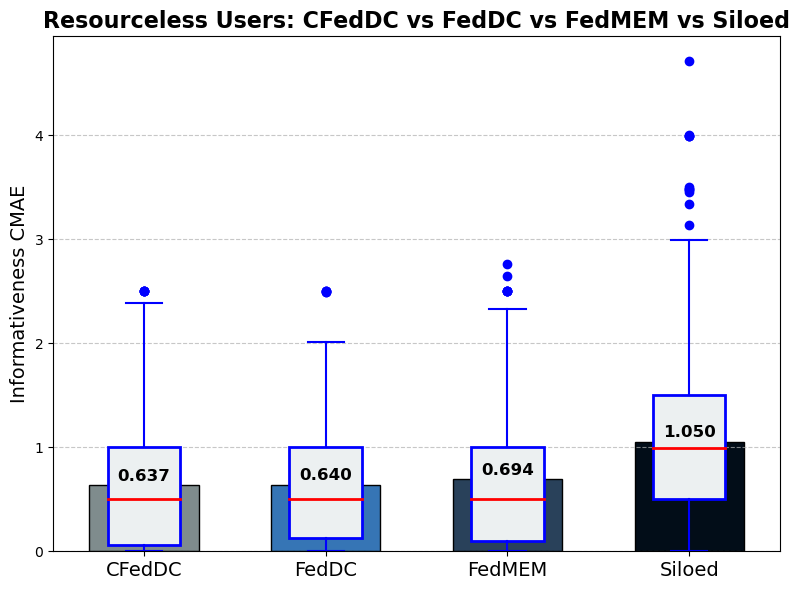

Plot saved as plots/resourceless_comparison_box.png


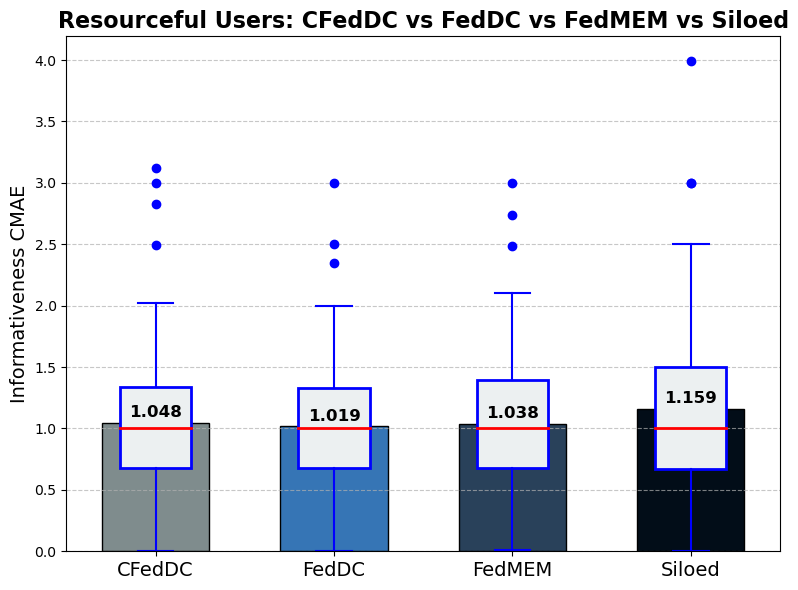

Plot saved as plots/resourceful_comparison_box.png


In [12]:

import matplotlib.pyplot as plt
import numpy as np
import os

# Make sure output directory exists
output_dir = 'plots'
os.makedirs(output_dir, exist_ok=True)

# === Compute averages ===
avg_resourceless_cfeddc = np.mean(resourceless_cmae_cfeddc) if resourceless_cmae_cfeddc else float('nan')
avg_resourceless_feddc  = np.mean(resourceless_cmae_feddc)  if resourceless_cmae_feddc  else float('nan')
avg_resourceless_fedmem = np.mean(resourceless_cmae_fedmem) if resourceless_cmae_fedmem else float('nan')
avg_resourceless_siloed = np.mean(resourceless_cmae_siloed) if resourceless_cmae_siloed else float('nan')

avg_resourceful_cfeddc  = np.mean(resourceful_cmae_cfeddc)  if resourceful_cmae_cfeddc  else float('nan')
avg_resourceful_feddc   = np.mean(resourceful_cmae_feddc)   if resourceful_cmae_feddc   else float('nan')
avg_resourceful_fedmem  = np.mean(resourceful_cmae_fedmem)  if resourceful_cmae_fedmem  else float('nan')
avg_resourceful_siloed  = np.mean(resourceful_cmae_siloed)  if resourceful_cmae_siloed  else float('nan')

# === General plotting function ===
def plot_category_comparison(category_name,
                             cfeddc_values, feddc_values, fedmem_values, siloed_values,
                             avg_cfeddc,   avg_feddc,   avg_fedmem,   avg_siloed,
                             filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # four bars
    bar_heights = [avg_cfeddc, avg_feddc, avg_fedmem, avg_siloed]
    bar_positions = np.arange(len(bar_heights))
    bar_labels    = ['CFedDC', 'FedDC', 'FedMEM', 'Siloed']
    
    # Bar plot
    bars = ax.bar(bar_positions, bar_heights,
                  color=['#7f8c8d', '#3675b5', '#29415a', '#020d18'],
                  width=0.6, edgecolor='black')
    
    # Boxplot overlay
    box_data = [cfeddc_values, feddc_values, fedmem_values, siloed_values]
    ax.boxplot(box_data,
               positions=bar_positions,
               widths=0.4,
               patch_artist=True,
               boxprops=dict(facecolor='#ecf0f1', color='blue', linewidth=2),
               medianprops=dict(color='red', linewidth=2),
               whiskerprops=dict(color='blue', linewidth=1.5),
               capprops=dict(color='blue', linewidth=1.5),
               flierprops=dict(marker='o', markerfacecolor='blue',
                               markersize=6, linestyle='none',
                               markeredgecolor='blue'))
    
    # Annotate bar means
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h * 1.02,
                f'{h:.3f}', ha='center', va='bottom',
                fontsize=12, fontweight='bold')
    
    # Labels and grid
    ax.set_title(f'{category_name} Users: CFedDC vs FedDC vs FedMEM vs Siloed',
                 fontsize=16, fontweight='bold')
    ax.set_ylabel('Informativeness CMAE', fontsize=14)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    out_path = os.path.join(output_dir, filename)
    plt.savefig(out_path)
    plt.show()
    print(f"Plot saved as {out_path}")

# === Plot Resourceless ===
plot_category_comparison(
    category_name='Resourceless',
    cfeddc_values=resourceless_cmae_cfeddc,
    feddc_values=resourceless_cmae_feddc,
    fedmem_values=resourceless_cmae_fedmem,
    siloed_values=resourceless_cmae_siloed,
    avg_cfeddc=avg_resourceless_cfeddc,
    avg_feddc=avg_resourceless_feddc,
    avg_fedmem=avg_resourceless_fedmem,
    avg_siloed=avg_resourceless_siloed,
    filename='resourceless_comparison_box.png'
)

# === Plot Resourceful ===
plot_category_comparison(
    category_name='Resourceful',
    cfeddc_values=resourceful_cmae_cfeddc,
    feddc_values=resourceful_cmae_feddc,
    fedmem_values=resourceful_cmae_fedmem,
    siloed_values=resourceful_cmae_siloed,
    avg_cfeddc=avg_resourceful_cfeddc,
    avg_feddc=avg_resourceful_feddc,
    avg_fedmem=avg_resourceful_fedmem,
    avg_siloed=avg_resourceful_siloed,
    filename='resourceful_comparison_box.png'
)




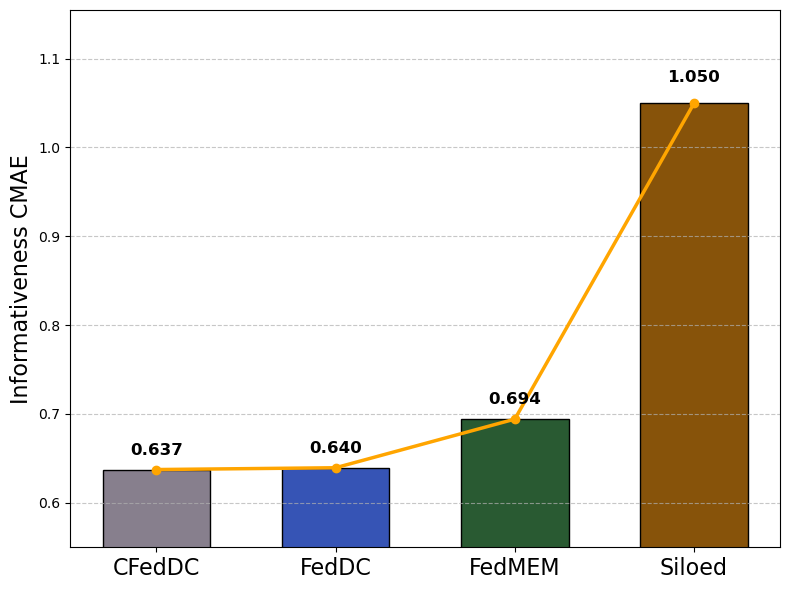

Plot saved as plots/resourceless_comparison_bar_line.png


In [13]:
def plot_category_comparison(category_name,
                             cfeddc_values, feddc_values, fedmem_values, siloed_values,
                             avg_cfeddc,   avg_feddc,   avg_fedmem,   avg_siloed,
                             filename, ylim):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Bar data
    bar_heights = [avg_cfeddc, avg_feddc, avg_fedmem, avg_siloed]
    bar_positions = np.arange(len(bar_heights))
    bar_labels = ['CFedDC', 'FedDC', 'FedMEM', 'Siloed']

    # Bar plot
    bars = ax.bar(bar_positions, bar_heights,
                  color=["#877f8d", "#3654b5", "#295a32", "#87530a"],
                  width=0.6, edgecolor='black')

    # Line connecting mean values
    ax.plot(bar_positions, bar_heights, marker='o', color='orange', linewidth=2.5, label='Mean Line')

    # Annotate each bar with its mean value
    for idx, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, h * 1.02,
                f'{h:.3f}', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

    # Highlight highest value
    # max_val = max(bar_heights)
    # max_idx = bar_heights.index(max_val)
    # ax.text(bar_positions[max_idx], max_val * 1.1,
    #        f'Highest: {max_val:.3f}', ha='center', color='darkred',
    #        fontsize=13, fontweight='bold')
    # ax.plot(bar_positions[max_idx], max_val, marker='o', markersize=10, color='red')

    # Labels and style
    # ax.set_title(f'{category_name} Users: CFedDC vs FedDC vs FedMEM vs Siloed',
    #             fontsize=16, fontweight='bold')
    ax.set_ylabel('Informativeness CMAE', fontsize=16)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(bar_labels, fontsize=16)
    ax.set_ylim(ylim, max(bar_heights) * 1.1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # ax.legend()

    plt.tight_layout()
    out_path = os.path.join(output_dir, filename)
    plt.savefig(out_path)
    plt.show()
    print(f"Plot saved as {out_path}")


plot_category_comparison(
    category_name='Resourceless',
    cfeddc_values=resourceless_cmae_cfeddc,
    feddc_values=resourceless_cmae_feddc,
    fedmem_values=resourceless_cmae_fedmem,
    siloed_values=resourceless_cmae_siloed,
    avg_cfeddc=avg_resourceless_cfeddc,
    avg_feddc=avg_resourceless_feddc,
    avg_fedmem=avg_resourceless_fedmem,
    avg_siloed=avg_resourceless_siloed,
    filename='resourceless_comparison_bar_line.png',
    ylim=0.55
)

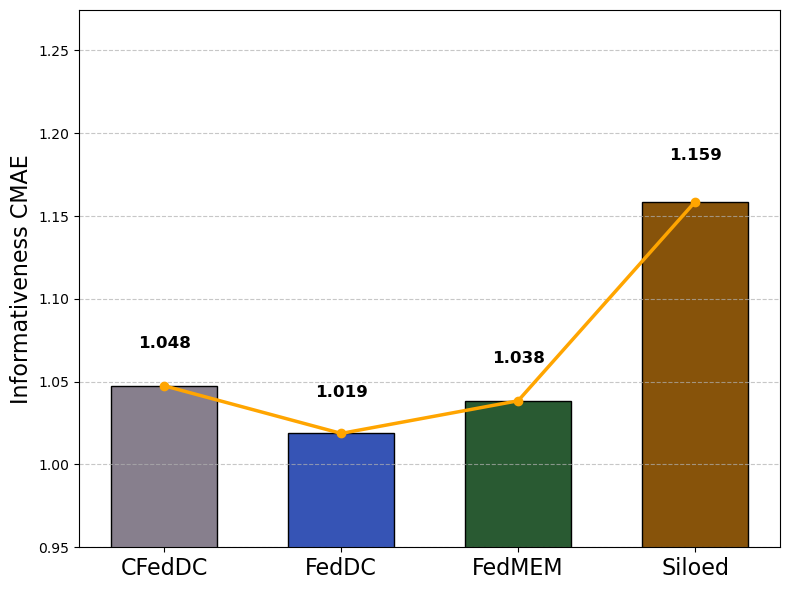

Plot saved as plots/resourceful_comparison_bar_line.png


In [14]:
plot_category_comparison(
    category_name='Resourceful',
    cfeddc_values=resourceful_cmae_cfeddc,
    feddc_values=resourceful_cmae_feddc,
    fedmem_values=resourceful_cmae_fedmem,
    siloed_values=resourceful_cmae_siloed,
    avg_cfeddc=avg_resourceful_cfeddc,
    avg_feddc=avg_resourceful_feddc,
    avg_fedmem=avg_resourceful_fedmem,
    avg_siloed=avg_resourceful_siloed,
    filename='resourceful_comparison_bar_line.png',
    ylim=0.95
)